# Javier Palomares Homework 1 a

## Programming Questions


In [1]:
import numpy as np



### Question 1

Create 1000 samples from a Gaussian distribution with mean -10 and standard deviation 5. Create another 1000 samples from another independent Gaussian with mean 10 and standard deviation 5.


In [2]:
numSamples = 1000
mean1 = -10
stdDev1 = 5
samples1 = np.random.normal(mean1,stdDev1,numSamples)
mean2 = 10
stDev2 = 5
samples2 = np.random.normal(mean2,stDev2,numSamples)


#### Part a
Take the sum of 2 these Gaussians by adding the two sets of 1000 points, point by point, and plot the histogram of the resulting 1000 points. What do you observe? 

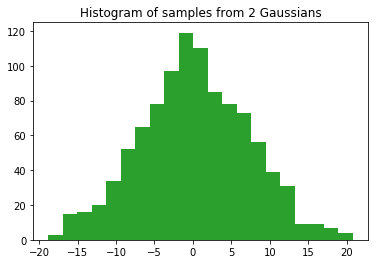

In [14]:
samplesSum = samples1+samples2
import matplotlib.pyplot as plt
plt.hist(samplesSum, bins='auto')
plt.title('Histogram of samples from 2 Gaussians')
plt.show()

 I observed a Gaussian distribution centered around 0. It also looks like the standard deviation is greater than 5.

#### Part b
Estimate the mean and the variance of the sum


I estimate the mean is 0, and the variance is around 7<sup>2</sup>. I estimated this visually from the histogram



In [105]:
print('The mean is {}'.format(np.mean(samplesSum))) 
print('The variance is {}'.format(np.var(samplesSum)))


The mean is 0.2581822261091743
The variance is 50.48010707953012


### Question 2: Central Limit Theorem
 Let Xi be an iid Bernoulli random variable with value {-1,1}. Look at the random variable Zn = 1 nPXi. By taking 1000 draws from Zn, plot its histogram.Check that for small n (say, 5-10) Zn does not look that much like a Gaussian, but when n is bigger (already by the time n = 30 or 50) it looks much more like a Gaussian. Check also for much bigger n: n = 250, to see that at this point, one can really see the bell curve.


#### Small n

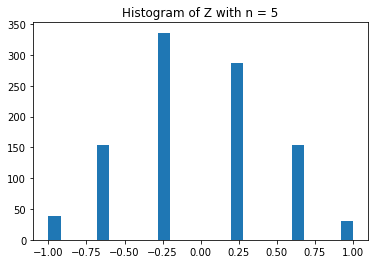

In [195]:
def replaceInArray(arr,toReplace,replaceWith):
    for i in range(len(arr)):
        if(arr[i] == toReplace):
            arr[i] = replaceWith
            
numTrials = 1000
z = np.zeros(numTrials)  
n = 5
p = .5
for i in range(numTrials):
    x=np.random.binomial(size=n, n=1, p=p)
    replaceInArray(x,0,-1)
    z[i] = 1/n * np.sum(x)
plt.hist(z, bins='auto')
plt.title('Histogram of Z with n = 5')
plt.show()

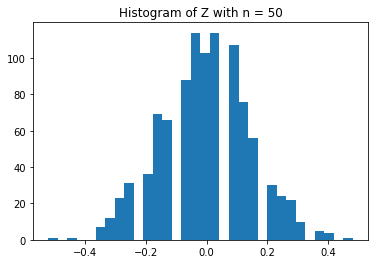

In [196]:
z = np.zeros(numTrials)  
n = 50
p = .5
for i in range(numTrials):
    x=np.random.binomial(size=n, n=1, p=p)
    replaceInArray(x,0,-1)
    z[i] = 1/n * np.sum(x)
plt.hist(z, bins='auto')
plt.title('Histogram of Z with n = 50')
plt.show()

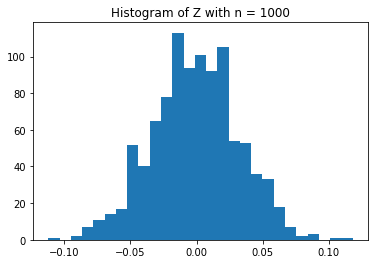

In [203]:
z = np.zeros(numTrials)  
n = 1000
p = .5
for i in range(numTrials):
    x=np.random.binomial(size=n, n=1, p=p)
    replaceInArray(x,0,-1)
    z[i] = 1/n * np.sum(x)
plt.hist(z, bins='auto')
plt.title('Histogram of Z with n = 1000')
plt.show()

The histogram looks more like a Gaussian with n=1000

### Question 3
Estimate the mean and standard deviation from 1 dimensional data: generate 25,000 samples from a Gaussian distribution with mean 0 and standard deviation 5. Then estimate the mean and standard deviation of this gaussian using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

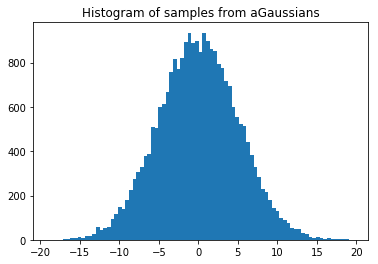

In [106]:
numSamples = 25000
mean = 0
stdDev = 5
samples = np.random.normal(mean,stdDev,numSamples)
plt.hist(samples, bins='auto')
plt.title('Histogram of samples from aGaussians')
plt.show()

Visually, I estimate the mean is 0, and the stdDev is around 5.

Computing the mean and standard deviation from elemental operations, I found:

In [107]:
sum = 0
for i in range(numSamples):
    sum += samples[i]
mean = sum / numSamples

variance = 0
for i in range(numSamples):
    variance += (samples[i] - mean)**2
variance /= numSamples


In [108]:
print("The mean is {}".format(mean))
print("The standard deviation is {}".format(np.sqrt(variance)))

The mean is 0.016334245976241328
The standard deviation is 5.033722935531415


### Question 4
Estimate the mean and covariance matrix for multi-dimensional data: generate 10,000 samples of 2 dimensional data from the Gaussian distribution.
Then, estimate the mean and covariance matrix for this multi-dimensional data using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).


In [111]:
numSamples = 10000
mean = [-5,5]
covarianceMatrix = [[20, .8], [.8, 30]]
samples = np.random.multivariate_normal(mean, covarianceMatrix, numSamples)
X = samples[:,0]
Y = samples[:,1]

#Covariance_x_y  E [ (X - E[x]]) (Y - E[Y]) ]
meanX = 0
meanY = 0
for i in range(numSamples):
    meanX += X[i]
    meanY += Y[i]
meanX /= numSamples
meanY /= numSamples

#Covariance_x_y  E [ (X - E[x]]) (Y - E[Y]) ]
def covXY(X,Y,meanX,meanY):
    numSamples = len(X)
    cov = 0
    for j in range(numSamples):
        cov += (X[j] - meanX)*(Y[j] - meanY)
    cov /= numSamples
    return cov


cov = [[covXY(X,X,meanX,meanY), covXY(X,Y,meanX,meanY)],
       [covXY(Y,X,meanY,meanX), covXY(Y,Y,meanY,meanY)]]
print("The mean of X is {}".format(meanX))
print("The mean of Y is {}".format(meanY))
print("The covariance matrix is")
print(np.matrix(cov))

The mean of X is -4.997486816532748
The mean of Y is 5.053318489738599
The covariance matrix is
[[ 20.18486288   0.8123284 ]
 [  0.8123284   30.10707126]]


### Question 5
Download from Canvas/Files the dataset PatientData.csv.
Each row is a patient and the last column is the condition that the patient has. Do data exploration using Pandas and other visualization tools to understand what you can about the dataset.

In [277]:
import pandas as pd
filepath='./PatientData.csv'
df = pd.read_csv(filepath,header=None)
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.8+ KB


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


 For example:  
 (a) How many patients and how many features are there?

In [144]:
numPatients= df.shape[0]
numFeatures = df.shape[1]
print("There are {} patients and {} feature".format(numPatients,numFeatures))

There are 452 patients and 280 feature


b) What is the meaning of the ﬁrst 4 features? See if you can understand what they mean. 

In [140]:
feature1 = df.loc[:,0]
feature2 = df.loc[:,1]
feature3 = df.loc[:,2]
feature4 = df.loc[:,3]

# patient condition is the last column
patientCondition = df.loc[:,numFeatures-1]

print("feature1  type")
print(feature1.get_dtype_counts())

print("\nfeature2  type")
print(feature2.get_dtype_counts())

print("\nfeature3  type")
print(feature3.get_dtype_counts())

print("\nfeature4  type")
print(feature4.get_dtype_counts())

feature1  type
int64    1
dtype: int64

feature2  type
int64    1
dtype: int64

feature3  type
int64    1
dtype: int64

feature4  type
int64    1
dtype: int64


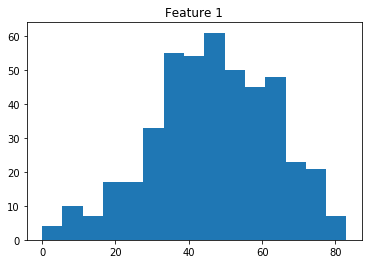

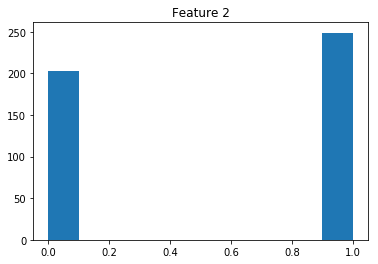

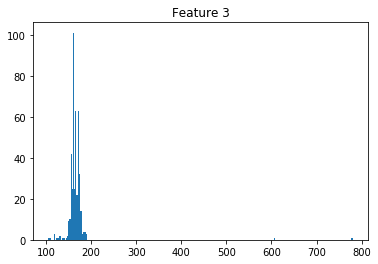

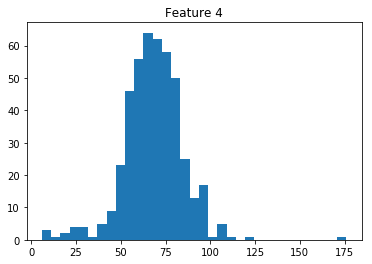

In [136]:
import matplotlib.pyplot as plt

plt.hist(feature1, bins='auto')
plt.title('Feature 1')
plt.show()

plt.hist(feature2,bins='auto')
plt.title('Feature 2')
plt.show()

plt.hist(feature3,bins='auto')
plt.title('Feature 3')
plt.show()

plt.hist(feature4, bins='auto')
plt.title('Feature 4')
plt.show()

Looking at the range of values, it looks like 
* first column is age in years,
* second column is a binary variable representing the gender
* third column is weight in pounds
* fourth column is height in inches

c) Are there missing values? Replace them with the average of the corresponding feature column

In [279]:
nanMatrix = ~df.applymap(np.isreal)
# find all the columns that have missing values
nanCols = nanMatrix.all(0)
for col in range(len(nanCols)):
    if(nanCols[col]):
        # the column has missing values.
        # replace them with the mean
        values = df.iloc[:,col]
        s = 0
        n = 0
        # find the mean of the column
        for row in range(len(values)):
            if str.isnumeric(values.iloc[row]):
                s += float(values.iloc[row])
                n += 1
        mean = s/n
        for row in range(len(values)):
            # replace numeric strings with their numeric value
            if str.isnumeric(values.iloc[row]):
                df.iloc[row,col] = float(values.iloc[row])
             # replace nans with the mean value
            else:
                df.iloc[row,col] = mean
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.8+ KB


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


d) How could you test which features strongly inﬂuence the patient condition and which do not  
I will test for strong influence by computing the covariance of each feature with the patientCondition




In [293]:
featureCovariance = np.zeros(numFeatures)
for i in range(len(featureCovariance)):
    feature = df.iloc[:,i]
    featureCovariance[i] = np.cov(feature.astype('float'),patientCondition)[0][1]

List what you think are the three most important features.

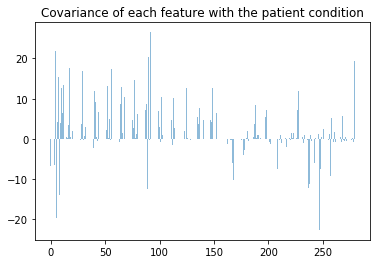

In [297]:
x = np.arange(len(featureCovariance))
 
plt.bar(x, featureCovariance, align='center', alpha=0.5)
plt.title('Covariance of each feature with the patient condition')
plt.show()

In [302]:
np.argpartition(featureCovariance,-3)[-3:]

array([90,  4, 92], dtype=int64)

The features with the highest covariance are in columns at position 90, 4, 92